# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
plt.style.use('ggplot')

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\vuong\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


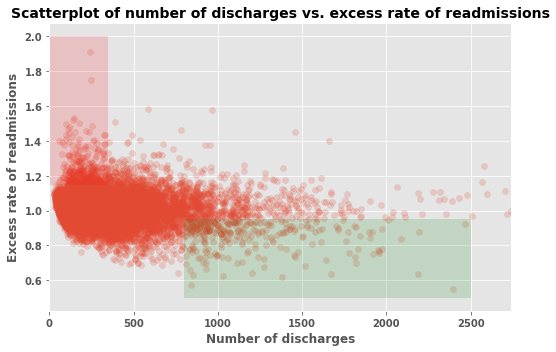

In [42]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [49]:
# Your turn

In [121]:
low_discharge =  clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
low_discharge = low_discharge.dropna(subset=['Excess Readmission Ratio'])
low_excess_RR = low_discharge['Excess Readmission Ratio']
#mean rate and proportion of readmission ratio for low discharge group
mean_rate_low = low_excess_RR.mean()
propor_low = (low_excess_RR > 1).mean()
print(f'Mean: {mean_rate_low}, Proportion: {propor_low}')

Mean: 1.0226183501683506, Proportion: 0.6321548821548821


In [122]:
#High discharge number
high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
#take out nan ratios
high_discharge = high_discharge.dropna(subset=['Excess Readmission Ratio'])
high_excess_RR = high_discharge['Excess Readmission Ratio']
#mean rate and proportion of readmission ratio for high discharge group
mean_rate_high = high_excess_RR.mean()
propor_high = (high_excess_RR > 1).mean()
print(f'Mean: {mean_rate_high}, Proportion: {propor_high}')

Mean: 0.9783354211663071, Proportion: 0.4449244060475162


**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges <br/>
<font color=red>**Looking at the overall picture of readmission rate vs. number of discharges, we would not take away this impression of correlation. As the number of discharges increases, there are no clear visual indicators that readmission rate is trending down.**</font>
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)<br/>
<font color=red>**Although it is something of note, the small patch in the lower parts of the shaded red area hardly amount to significant evidence. The trace amount of low discharge, high in excess readmission is worth exploring since it seems to clearly jump out from the bulk of data points.**</font>
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)<br/>
<font color=red>**This observation holds even less validity since there seems to be just as many if not more data points above the green shaded region.**</font>

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 <br/>
<font color=red>**The calculations check out for these two statistics.**</font>
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 <br/>
<font color=red>**For high discharge, the mean rate is indeed .978 and proportion of excess readmission is ~.44.**</font>

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. <br/>
<font color=red>**We would not come to this conclusion based off of the scatterplot above. There is no obvious trend to be observed from the plot. From hypothesis testing, we found statistically significant correlation but the magnitude is questionable.**</font>
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.<br/>
<font color=red>**We would not conclude and infer such claim. Although it is certainly worth exploring the data points that stray from the mass for low discharge facilities. We can look at the expected readmission rate and other factors such as state for possible clues.**</font>

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.<br/>
<font color=red>**Base on the observed small impact of number of discharges on readmission ratio, we shouldn't immediately recommend such drastic measures.**</font>
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.<br/>
<font color=red>**This is an ill advised recommendation base on just the preliminary analysis. Even if this is the right course of action, we have to consider what kind of impact , other than financial, will this have on the quality of care like distance from a facility.**</font>

In [ ]:
#further clean data
df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])

In [152]:
np.random.seed(98765)
#observed correlation coef. 
obs_corr = np.corrcoef(df['Number of Discharges'], df['Excess Readmission Ratio'])[0,1]

perm_reps = np.empty(100000)
#Permute Number of discharge, retaining Excess RR
for i in range(100000):
    permuted = np.random.permutation(df['Number of Discharges'])
    
    perm_reps[i] = np.corrcoef(permuted, df['Excess Readmission Ratio'])[0,1]

perm_pval = np.sum(perm_reps <= obs_corr) / len(perm_reps)
#correlation is statistically significant
perm_pval

0.0

In [219]:
#Separate data into 2 groups: ratio over and below 1
excess_over1 = df.loc[df['Excess Readmission Ratio'] > 1]
excess_below1 = df.loc[df['Excess Readmission Ratio'] <= 1]

over1_mean = excess_over1['Number of Discharges'].mean()
over1_std = excess_over1['Number of Discharges'].std()

below1_mean = excess_below1['Number of Discharges'].mean()
below1_std = excess_below1['Number of Discharges'].std()

n_over = len(excess_over1['Number of Discharges'])
n_below = len(excess_below1['Number of Discharges'])
#observed diff. in mean
obs_mean_diff = over1_mean - below1_mean
#standard error
se = np.sqrt((over1_std**2 / n_over) + (below1_std **2 / n_below))
test_stat = obs_mean_diff / se
p_val = stats.norm.cdf(test_stat) * 2 

# stats.t.cdf(test_stat, min(n_over - 1, n_below - 1)) * 2 #t-test p-val ~ 1.1516e-7

ci = obs_mean_diff + np.array([-se, se]) #95% CI for true diff in number of discharges
print(f'P-value: {p_val}\nCI:{ci}')

P-value: 1.1085748347711099e-07
CI:[-36.41556746 -24.86966247]


Considering significance level at $\alpha$ = .01, we would reject the null in favor of the alternative with our small p-value of approximately 0.000000111. Our difference in mean number of discharges for the two groups is statistically significant.

Stistical significance refers to our findings from formal testing being indicative of some effect. In our test above, it is that statistically speaking, we found some difference between the two means and that it's not likely due to random chance/error. It is important to note that we do not get the magnitude of the effect. On the other hand, practical significance requires that we explore further on the actual, applicable meaning behind our results. We have to examine the magnitude of the effect relative to some standard.

In our case, the distinction is important considering our p-value is small but the observed effect is also small. First, we can hardly pinpoint a trend from the above scatterplot. Second, the correlation calculated above is rather small (-0.097) so practically, we may not want to devote too much resources into increasing the hospital size (increase discharges). The p-value from the simulation also suggests statistical significance. This is possibly due to the sample sizes being large so even a small effect is likely to be detected as significant. Regarding recommendations to the client, it would be wise to perform further analysis with the inclusion of the other variables. We may even want to examine the measure being used, namely the predicted readmission rate and how it compares to the actual rate.

Generally, an advantage of using scatterplots to display information is that it paints a complete, albeit messy in this case, picture of the data being compared. If there were an obvious trend, a scatterplot would have revealed it with relatively little work. However, when there is a lot going on with large samples, it may not be easy to discern any real association. Furthermore, being a plot, we don't get any quanitative measures. We can modify the scatterplot above to more clearly distinguish possible groups and pinpoint local effects.

C:\Users\vuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


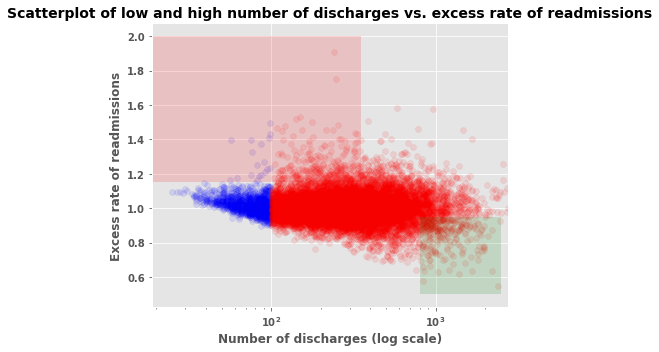

In [218]:
low_dis = df[df['Number of Discharges'] < 100]
high_dis = df[df['Number of Discharges'] > 100]
x_low_dis = [e for e in low_dis['Number of Discharges']]
y_low_dis = [e for e in low_dis['Excess Readmission Ratio']]
x_high_dis = [e for e in high_dis['Number of Discharges']]
y_high_dis = [e for e in high_dis['Excess Readmission Ratio']]
#plot low vs high discharge separately
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_low_dis, y_low_dis,alpha=0.1, color='b')
ax.scatter(x_high_dis,y_high_dis,alpha=.1, color='r')

plt.xscale('log') #log scale to better observe low discharge group

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x_high_dis[:-3])])
ax.set_xlabel('Number of discharges (log scale)', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of low and high number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [217]:
min(x_low_dis)

25